## Notebook 3 — Exploratory Data Analysis & Hypothesis Testing

### Objectives
- Perform exploratory visualisation and test simple hypotheses to uncover behavioural and operational patterns in the ER population.

### Inputs
- Cleaned dataset stored in ../data/cleaned_emergency_room.csv.

### Outputs
- Visualisations, summary insights, and confirmed/rejected hypotheses.

## Section 1 — Load Cleaned Dataset

We import the cleaned dataset generated in Notebook 2  
to begin visual exploration and hypothesis testing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/cleaned_emergency_room.csv")
df.head()

,Patient Id,Patient Admission Date,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Waittime,Patients CM
0,145-39-5406,2024-03-20 08:47:00,M,69,White,Unknown,False,39,0
1,316-34-3057,2024-06-15 11:29:00,M,4,Native American/Alaska Native,Unknown,True,27,0
2,897-46-3852,2024-06-20 09:13:00,F,56,African American,General Practice,True,55,0
3,358-31-9711,2024-02-04 22:34:00,F,24,Native American/Alaska Native,General Practice,True,31,0
4,289-26-0537,2024-09-04 17:48:00,M,5,African American,Orthopedics,False,10,0


## Section 2 — Patient Demographic Exploration

This section explores demographic characteristics of ER patients to understand  
who uses emergency services most frequently. Visualisations include:

- Age distribution
- Gender proportion
- Referral source breakdown

These insights help reveal population segments with higher demand and guide  
priority planning in healthcare delivery.

### 2.1 Patient Age Distribution

A histogram is used to understand how patient ages are distributed.

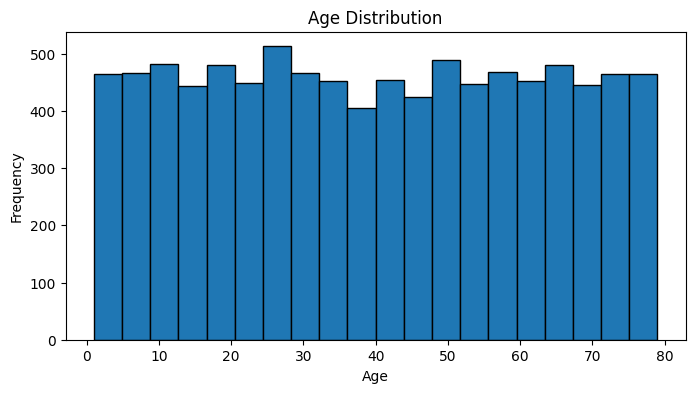

In [2]:
plt.figure(figsize=(8,4))
plt.hist(df["Patient Age"], bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

📌 *Insight*

The age distribution appears relatively even, suggesting no dominant patient group.  
This indicates that ER demand spans multiple age segments.

### 2.2 Gender Distribution

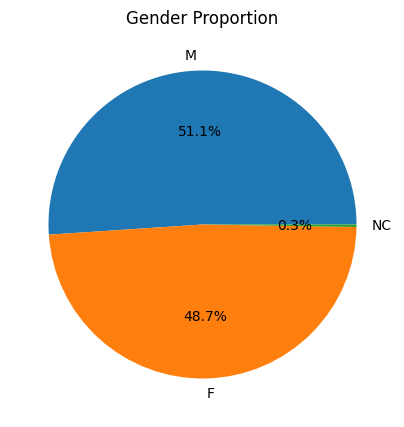

In [3]:
df["Patient Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(5,5))
plt.title("Gender Proportion")
plt.ylabel("")
plt.show()

*Insight:*  
Gender distribution is fairly balanced,  
indicating comparable service demand from both groups.

### 2.3 Referral Source Breakdown

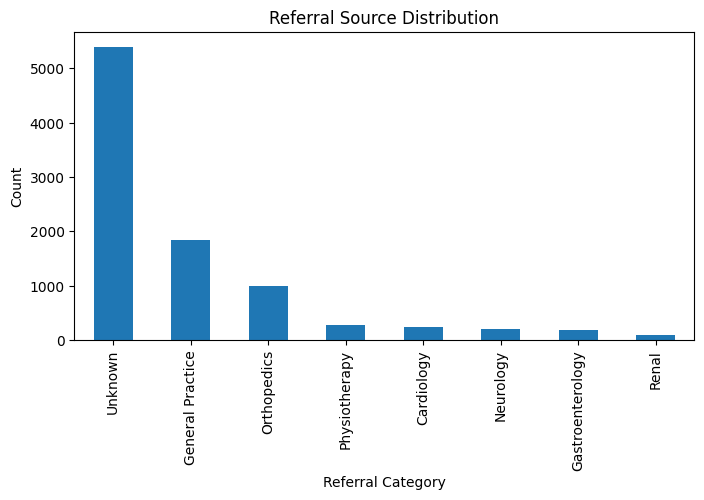

In [4]:
df["Department Referral"].value_counts().plot(kind="bar", figsize=(8,4))
plt.title("Referral Source Distribution")
plt.xlabel("Referral Category")
plt.ylabel("Count")
plt.show()

*Insight:*  
Most cases are non-referred walk-ins,  
indicating reliance on ER as a first point of access rather than coordinated referral.

### Hypothesis 1 — Older patients tend to wait longer in the ER.
We test this visually and statistically using scatter plotting and correlation analysis.

### Method

To examine whether older patients wait longer:

1. *Age groups were created* using categorical bins  
   (0–18, 19–35, 36–50, 51–65, 65+)  
   to enable meaningful comparison rather than individual ages.

2. *A boxplot was selected* because:
   - It displays median waiting time per age group
   - It highlights spread and outliers
   - It allows quick visual comparison between categories

3. *Distribution behaviour* was visually inspected to check if higher age groups show longer median or wider variation in waiting time.

In [6]:
# Create age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ["0–18", "19–35", "36–50", "51–65", "65+"]

df["Age Group"] = pd.cut(df["Patient Age"], bins=bins, labels=labels)

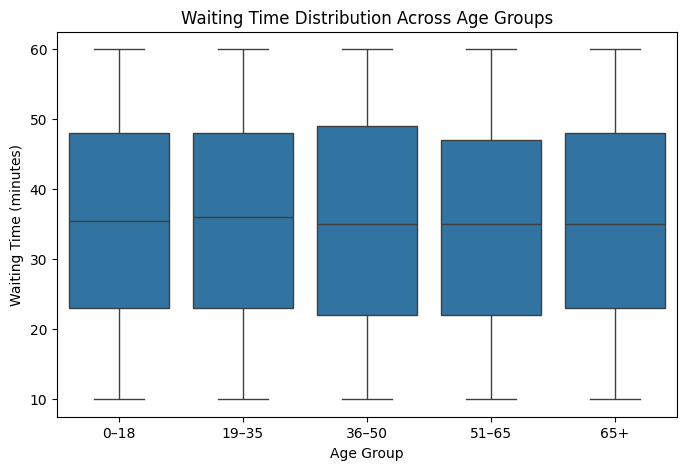

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Age Group"], y=df["Patient Waittime"])
plt.title("Waiting Time Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Waiting Time (minutes)")
plt.show()

*Insight:*  
Waiting time appears relatively similar across age groups, with no strong evidence that older patients experience significantly longer delays.  
This weakens support for the hypothesis that age strongly influences waiting duration.

###  Recommendation

Further investigation using additional variables such as triage level or admission severity  
may provide deeper understanding of waiting time drivers beyond age alone.

### Hypothesis 2 — Waiting Time Differences Based on Referral Type

We test whether referred patients experience different ER waiting times compared to walk-in patients.



### Method

To test this hypothesis, the following approach was taken:

1. *Grouping patients by referral category*  
   This enables comparison between walk-ins (Unknown) and medically referred cases.

2. *Visual exploration using a swarm plot*  
   A swarm plot was selected because it:
   - shows the full spread of waiting time values  
   - highlights clustering patterns  
   - helps visually compare variation between referral types

3. *Rotation of labels* improves readability given multiple categories.

4. *Colour formatting (orange palette)* ensures clear differentiation of markers.

c:\Users\ABDUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ABDUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ABDUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


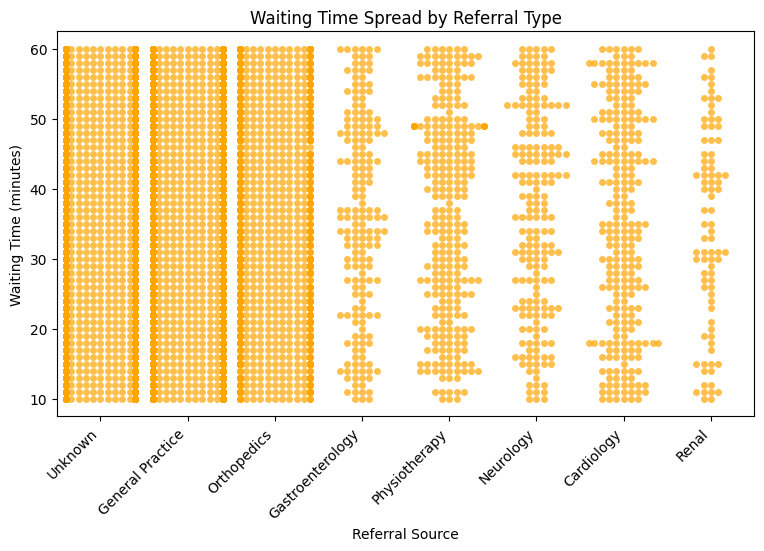

In [9]:
plt.figure(figsize=(9,5))
sns.swarmplot(
    x="Department Referral",
    y="Patient Waittime",
    data=df,
    color="orange",
    alpha=0.7
)

plt.xticks(rotation=45, ha='right')
plt.title("Waiting Time Spread by Referral Type")
plt.xlabel("Referral Source")
plt.ylabel("Waiting Time (minutes)")
plt.show()

*Insight:*  
The three highest ER arrival sources are walk-ins, general practice, and orthopedics.  
Walk-ins represent the largest volume of patients and therefore exhibit the longest waiting times.  
Orthopedic referrals also show elevated wait durations, suggesting higher demand or limited specialty capacity.

*Recommendation:*  
Consider introducing priority routing or capacity adjustments for high-volume referral types  
(e.g., walk-ins and orthopedics) to help balance demand and reduce waiting times.

##  Hypothesis 3 — Monthly ER demand varies across the year

### 🔹 Rationale  
We test this hypothesis because emergency room demand often shows seasonal variation.  
Certain months may experience higher case volumes due to:

- flu waves  
- public holidays  
- behavioral and environmental factors  

Understanding these patterns helps hospitals plan staffing, supplies, and resource allocation.


*✔ Extracting Month from Admission Date*  
To group patient visits by time periods for comparison.

*✔ Counting visits per month*  
Allows measurement of peak demand periods.


### Monthly Trend Line  
A line plot helps show seasonal variation more clearly than bars by highlighting directional change.

In [13]:
# Extract month number from Patient Admission Date column
df["Admission Month"] = pd.to_datetime(df["Patient Admission Date"]).dt.month

In [14]:
monthly_counts = df["Admission Month"].value_counts().sort_index()

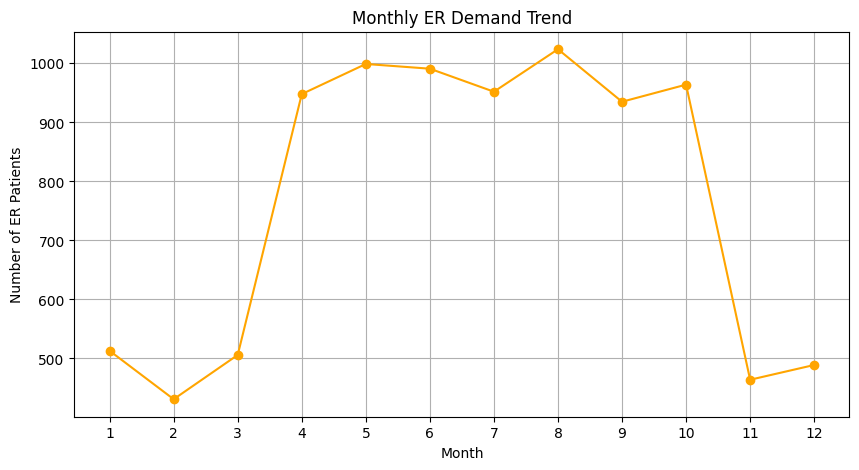

In [15]:
plt.figure(figsize=(10,5))
plt.plot(monthly_counts.index, monthly_counts.values, marker="o", color="orange")
plt.xlabel("Month")
plt.ylabel("Number of ER Patients")
plt.title("Monthly ER Demand Trend")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

*Insight:*  
ER demand appears lowest in early winter (Jan–Feb) and peaks in late summer (Aug).  
This pattern may reflect seasonal illness patterns, holiday behaviour, or variation in primary care availability.

### Recommendation  
Tracking seasonal demand patterns allows hospitals to adjust staffing, supplies, and bed capacity proactively,  
especially during summer peaks.
